# Tutorial1: ray tracing using kgeo

---
This tutorial demonstrates generation of ray trajectories around a black hole using in the Kerr metric. \
The software used is kgeo which is documented at: https://github.com/achael/kgeo

In [3]:
import bhnerf
import kgeo
import numpy as np

In [4]:
"""
Generate 1D rays across the equitorial plane of a non-spinning black hole
"""
npix = 64
inclination = 0.5
distance = 1000.0
spin = 0.0
image_coords = [np.linspace(-8.0,8.0,npix), np.zeros(npix)]
observer_coords=[0, distance, inclination, 0]

sensor_1d = kgeo.raytrace_ana(spin, observer_coords, image_coords, plotdata=False)

calculating preliminaries...
integrating in theta...0.03 s
integrating in r...0.05 s
done!   0.07577395439147949  seconds!


maxwraps  3


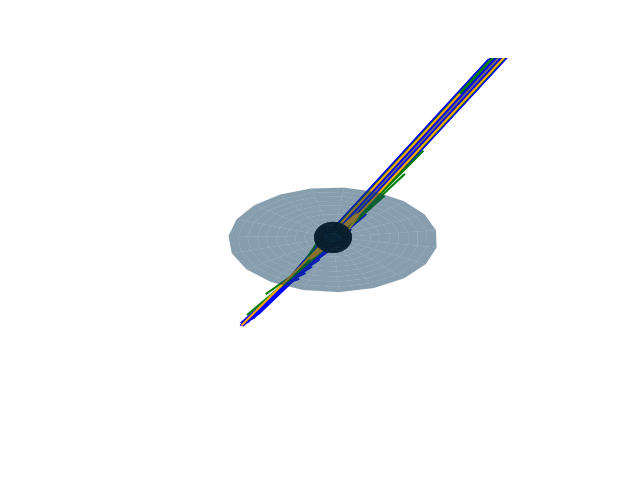

In [5]:
%matplotlib widget
sensor_1d.plotgeos(ngeoplot=-1)

In [8]:
"""
Generate 2D image plane rays across for a non-spinning black hole.
Here (num_alpha, num_beta) are the image resolution and ngeo is the sampling resolution along the ray 
"""
spin = 0.0
inclination = np.pi/2
distance = 1000.0

num_alpha, num_beta, ngeo = 64, 64, 100
alpha, beta = np.meshgrid(np.linspace(-8., 8., num_alpha), np.linspace(-8., 8., num_beta))
image_coords = [alpha.ravel(), beta.ravel()]
observer_coords=[0, distance, inclination, 0]

sensor_2d = kgeo.raytrace_ana(spin, observer_coords, image_coords, plotdata=False)

calculating preliminaries...
integrating in theta...1.29 s
integrating in r...2.67 s
done!   3.972104549407959  seconds!


In [7]:
"""
Save the ray trajectors (within sensor_2d Dataset) for later use e.g. to generate synthetic ngEHT measurements as in Tutorial 2.
"""
sensor_2d.attrs.update(num_alpha=num_alpha, num_beta=num_beta)
output_path = '../sensors/a{:0.2f}_th{:0.2f}_ngeo{}_npix{}.nc'.format(
    sensor_2d.spin.data, 
    sensor_2d.inc.data, 
    sensor_2d.geo.size, 
    sensor_2d.pix.size
)
sensor_2d.to_netcdf(output_path)